# Proyecto final - Lucas Esteban
## Análisis de satisfacción de clientes de una aerolínea

El presente proyecto tiene como objetivo principal analizar y predecir la satisfacción de los clientes de una aerolínea en función de diversas características relacionadas con su experiencia de vuelo. A través de un enfoque de clasificación, se busca identificar patrones que influyen en el nivel de satisfacción de los pasajeros y proporcionar información clave para la toma de decisiones estratégicas.

En un sector tan competitivo como la industria aérea, comprender qué factores impactan la satisfacción del cliente es crucial para mejorar los servicios, fidelizar pasajeros y optimizar la experiencia de viaje. Este análisis no solo permitirá identificar áreas de mejora, sino también anticipar posibles insatisfacciones, facilitando la implementación de estrategias proactivas para elevar la calidad del servicio.

Entre los beneficiarios de este proyecto estan:
- Las aerolineas: las cuales mejorarán la experiencia del cliente al entender sus necesidades y preferencias.
- Departamento de atención al Cliente: podran identificar segmentos de mercado específicos con mayores índices de insatisfacción.
- Clientes: Serán los principales beneficiarios de las mejoras implementadas, disfrutando de servicios más eficientes, cómodos y ajustados a sus expectativas.

### Hipótesis de interés:
En este proyecto se intentaran demostras las siguientes hipótesis:

- La distancia del vuelo tiene injerencia sobre la valoración.
- La facilidad para el check in online y el Wifi en el vuelo son importante para los clientes.
- La clase y tipo del viaje influye de manera contundente sobre la valoración.

### Objetivo:
- Demostrar las hipótesis anteriormente planteadas mediante gráficos.
- Identificar las tendencias en los datos.
- Realizar un modelo que pueda predecir con los datos anteriormente planteados si un usuario va a estar satisfecho o no.

### Impacto:
Al combinar herramientas de análisis de datos con algoritmos de clasificación, este proyecto busca proporcionar un modelo predictivo que permita a las aerolíneas no solo evaluar la satisfacción actual de los pasajeros, sino también anticiparse a posibles problemas y ofrecer soluciones personalizadas. De esta manera, el proyecto no solo aborda el presente, sino que también contribuye a la construcción de una experiencia de vuelo más satisfactoria y centrada en el cliente.




#### Comienzo importando el dataframe

El dataframe fue seleccionado de la pagina kaggle.

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
df.shape

(103904, 25)

In [6]:
nulos_por_columna = df.isnull().sum()

print(nulos_por_columna)

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Se puede observar que la columna 'Arrival Delay in Minutes' tiene nulos asi que procedo a remplazar los nulos por la mediana y tambien elimino las columnas que no se van a utilizar.

In [7]:
columnas_a_eliminar = ["Unnamed: 0","id", "Cleanliness", "Baggage handling", "Leg room service", "On-board service"]

df = df.drop(columns=columnas_a_eliminar)
df_test = df_test.drop(columns=columnas_a_eliminar)

In [8]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis=0))
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].median(axis=0))

In [9]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
Checkin service                      0
Inflight service                     0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Se puede ver que ya no quedaron valores nulos en el dataframe

In [10]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.304290,3.640428,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.265396,1.175663,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Se pueden extraer las siguientes conclusiones:
-La edad promedio de los pasajeros es de 39.38 años.

-Los retrasos en la salida varían significativamente. La media indica que, en promedio, los vuelos tienen un pequeño retraso, pero la alta desviación estándar sugiere que algunos vuelos tienen retrasos muy largos.

-Similar a los retrasos en la salida, los retrasos en la llegada muestran una gran variabilidad, con una media que indica un retraso promedio pequeño.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Gráficos

#### Podemos empezar viendo el balance y distribucion de algunas variables

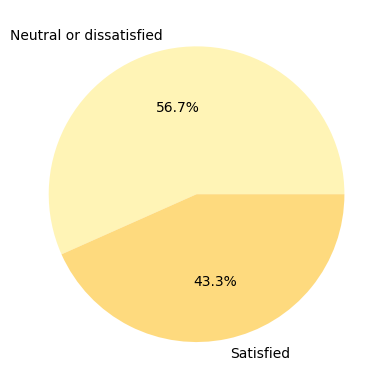

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Se puede ver que el 43,3% de los pasajeros esta satisfecho y el 56,7 no lo esta. Lo cual quiere decir que los datos estan bastante equilibrados y no requieren remuestreo.

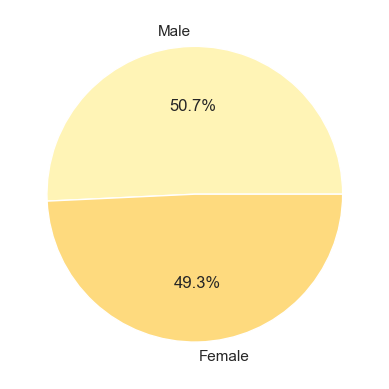

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df.Gender.value_counts(), labels = ["Male", "Female"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Vemos que tambien esta balanceado el porcentaje de pasajeros de cada genero.

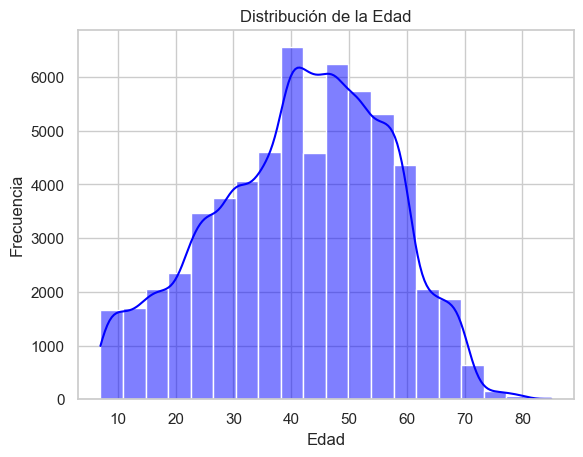

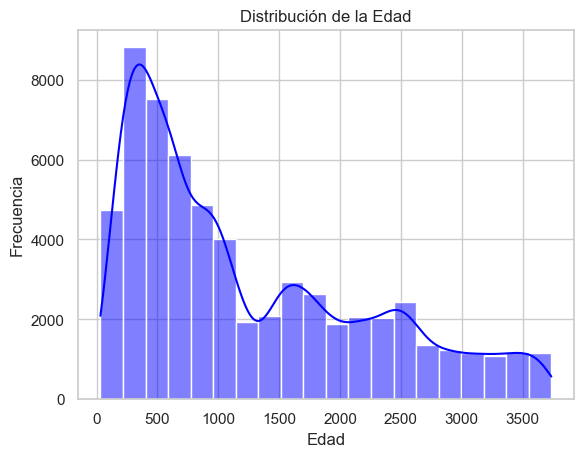

In [59]:
sns.histplot(train['Age'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(train['Flight Distance'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

- Se puede observar que la variable "Edad" tiene una distribucion normal.
- En cuanto a la distancia del vuelo se puede ver que tiene una distribucion asimetrica positiva.

### Mapa de correlación

In [13]:
numeric_data = df.select_dtypes(include=['number'])
corr_mat = numeric_data.corr()
print(corr_mat)

                                        Age  Flight Distance  \
Age                                1.000000         0.099461   
Flight Distance                    0.099461         1.000000   
Inflight wifi service              0.017859         0.007131   
Departure/Arrival time convenient  0.038125        -0.020043   
Ease of Online booking             0.024842         0.065717   
Gate location                     -0.001330         0.004793   
Food and drink                     0.023000         0.056994   
Online boarding                    0.208939         0.214869   
Seat comfort                       0.160277         0.157333   
Inflight entertainment             0.076444         0.128740   
Checkin service                    0.035482         0.073072   
Inflight service                  -0.049427         0.057540   
Departure Delay in Minutes        -0.010152         0.002158   
Arrival Delay in Minutes          -0.012105        -0.002470   

                                   Infl

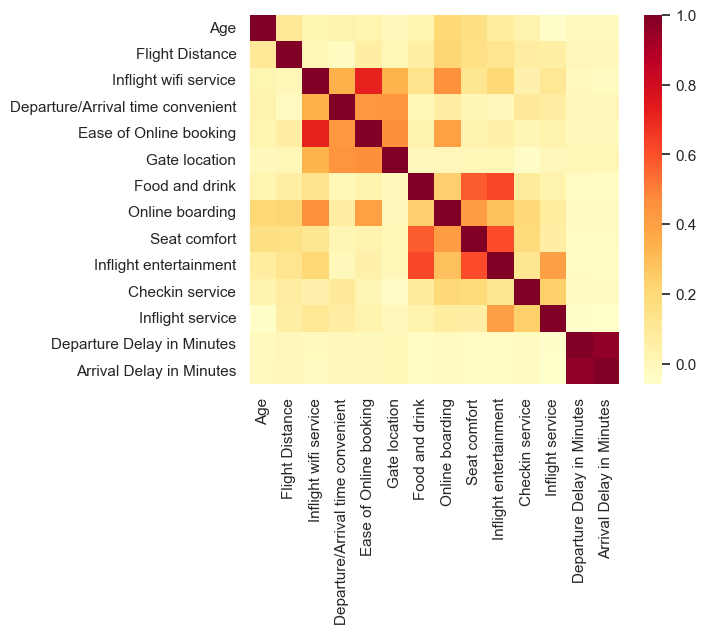

In [23]:
sns.heatmap(corr_mat, square = True, cmap = 'YlOrRd')
pass

Se puede ver que existe una fuerte correlación entre las características 'Retraso de salida en minutos' y 'Retraso de llegada en minutos'. El valor del coeficiente de correlación se podra observar con el siguiente calculo:

In [15]:
import numpy as np
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.960247
Inflight wifi service       Ease of Online booking      0.715856
Food and drink              Inflight entertainment      0.622512
Seat comfort                Inflight entertainment      0.610590
Food and drink              Seat comfort                0.574556
dtype: float64

## Diagrama de dispersión

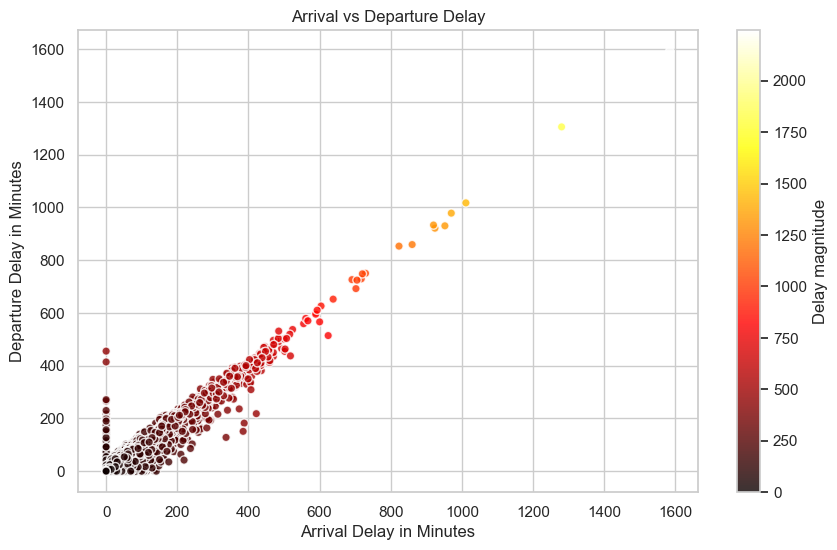

In [24]:

x = df['Arrival Delay in Minutes']
y = df['Departure Delay in Minutes']

colors = np.sqrt(x**2 + y**2) 

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, cmap='hot', alpha=0.8, edgecolor='w')

plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.title('Arrival vs Departure Delay')

plt.colorbar(label='Delay magnitude')

plt.show()

Los resultados obtenidos son bastante lógicos y se pueden explicar de la siguiente manera. Si el vuelo de los clientes de la aerolínea se retrasó una cierta cantidad de tiempo en la salida, entonces el vuelo se retrasará aproximadamente la misma cantidad de tiempo en el aterrizaje. 

## Gráfico de lineas segun check in online y satisfaccion

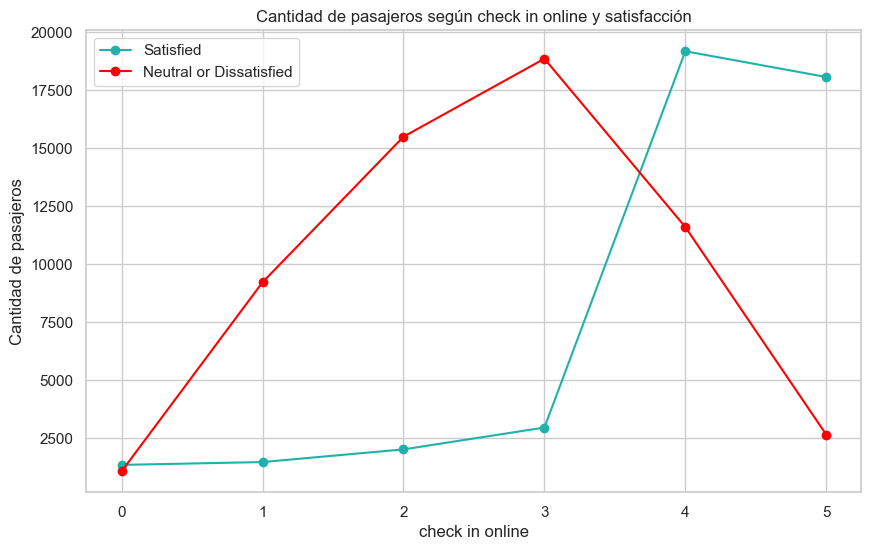

In [25]:
filtered_df = df[df['satisfaction'].isin(['neutral or dissatisfied', 'satisfied'])]

age_satisfaction_count = filtered_df.groupby(['Online boarding', 'satisfaction']).size().unstack()

plt.figure(figsize=(10, 6))

plt.plot(age_satisfaction_count.index, age_satisfaction_count['satisfied'], label='Satisfied', color='lightseagreen', marker='o')

plt.plot(age_satisfaction_count.index, age_satisfaction_count['neutral or dissatisfied'], label='Neutral or Dissatisfied', color='red', marker='o')

plt.title('Cantidad de pasajeros según check in online y satisfacción')
plt.xlabel('check in online')
plt.ylabel('Cantidad de pasajeros')
plt.legend()

plt.show()

Se puede ver que los clientes que tuvieron facilidad para hacer el check in online tienden a estar mucho mas satisfechos que los que lo encontraron dificil.

## Gráficos segun distancia de vuelo y tipo de clase

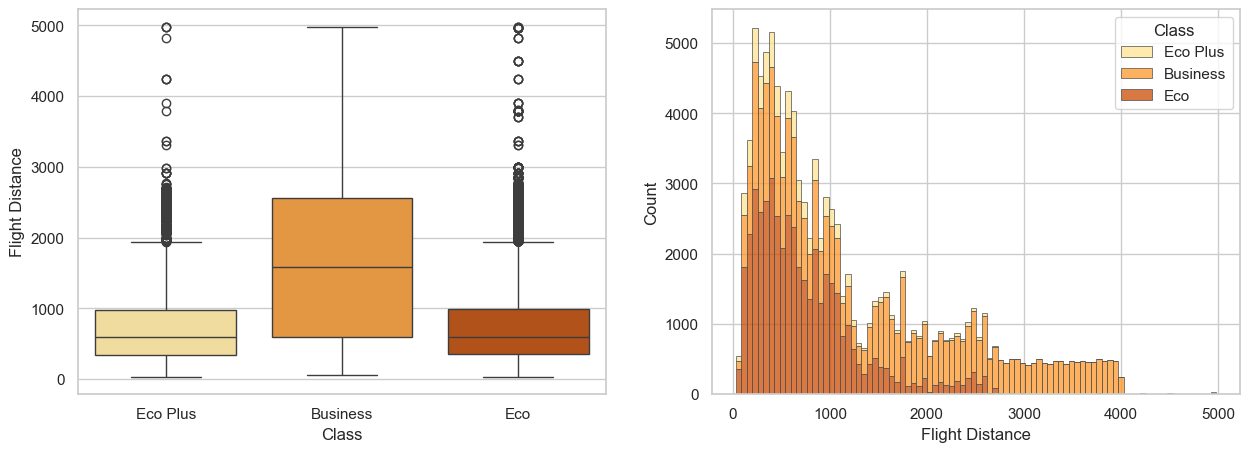

In [26]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x="Class", y="Flight Distance", hue="Class", palette="YlOrBr", data=df, ax=ax[0], dodge=False, legend=False)

sns.histplot(df, x="Flight Distance", hue="Class", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1])

plt.show()

De este diagrama de caja se puede extraer la siguiente conclusión: los clientes cuya distancia de vuelo es larga, en su mayoría vuelan en clase ejecutiva.

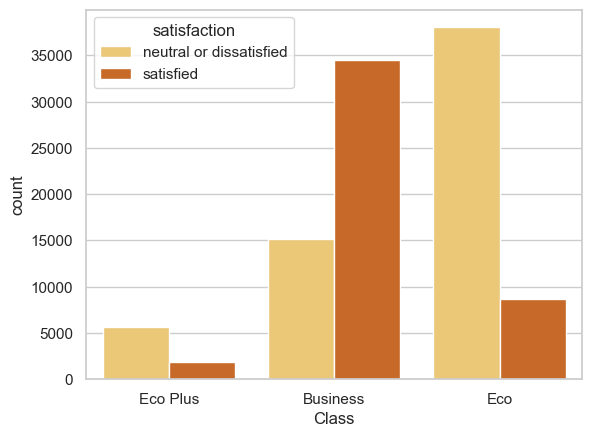

In [27]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

En este gráfico se puede ver muy evidente que la mayoría de los pasajeros que volaron en clase económica plus o económica no estuvieron satisfechos con el vuelo, y los que tuvieron la suerte de volar en clase ejecutiva tienden a estar mas satisfechos.

### Transformamos las columnas que no son numericas:

In [28]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    
    return df

train = process_data(df)
test = process_data(df_test)

In [36]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,4,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,4,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,1,4,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,3,0,0.0,1


### Satisfacción por genero y tipo de cliente

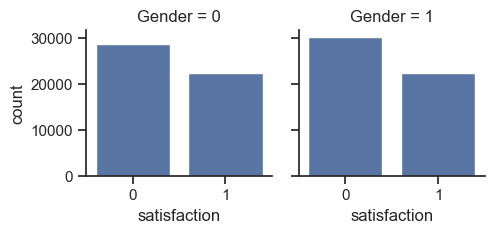

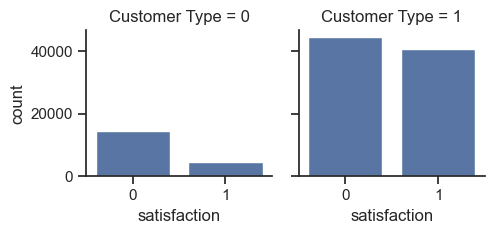

In [37]:
import seaborn as sns

with sns.axes_style(style='ticks'):
    # Primer gráfico
    g1 = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)
    
    # Segundo gráfico
    g2 = sns.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)


- Se observa que la distribución por género de clientes satisfechos e insatisfechos es bastante similar.
- Los pasajeros fieles son muy numerosos. Incluso entre los pasajeros leales, la proporción entre satisfechos e insatisfechos es casi de 49:51

### Satisfacción por edad

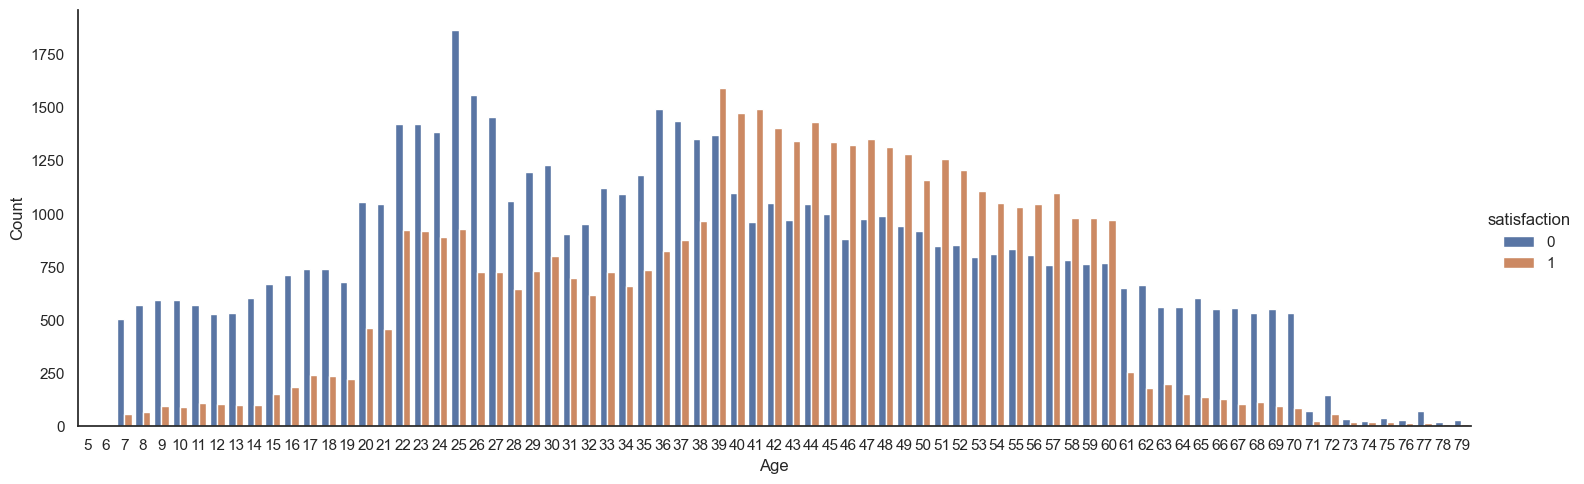

In [38]:
import seaborn as sns

with sns.axes_style('white'):
    g = sns.catplot(
        x="Age", 
        data=train, 
        aspect=3.0, 
        kind='count', 
        hue='satisfaction', 
        order=range(5, 80)
    )
    g.set_ylabels('Count')
    g.set_xlabels('Age')


Entre los 7 a 38 años y entre los 61 a 79 años, el numero de pasajeros insatisfechos es muy alto en comparación con el de pasajeros satisfechos. Por el contrario, en el rango de edad de 39 a 60 años, el numero de pasajeros satisfechos es mayor que el de pasajeros insatisfechos.

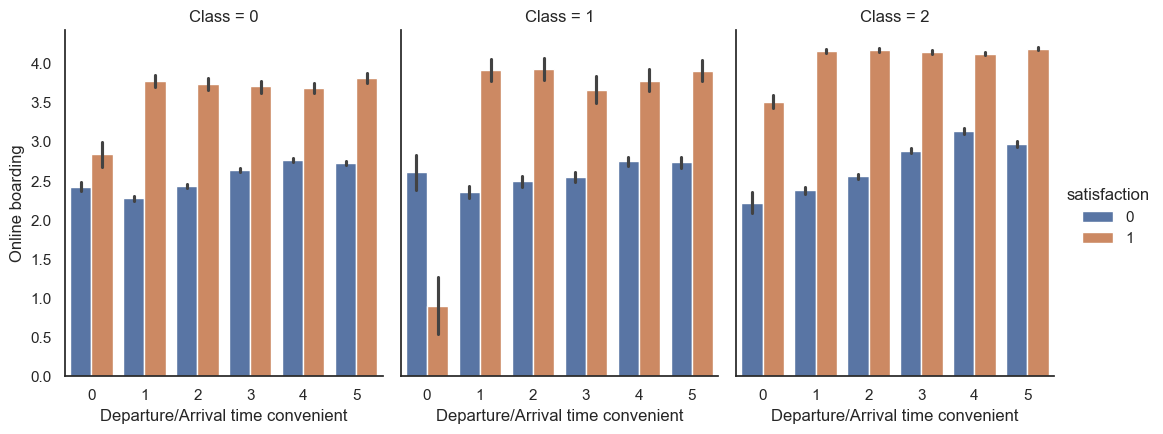

In [42]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Para la clase Eco Plus, la hora de salida/llegada muy inconveniente  tiene un número realmente alto de pasajeros insatisfechos, incluso cuando el embarque online se realiza muy bien. Para otras combinaciones, el numero de pasajeros satisfechos están en el lado superior en comparación con el numero de pasajeros insatisfechos.

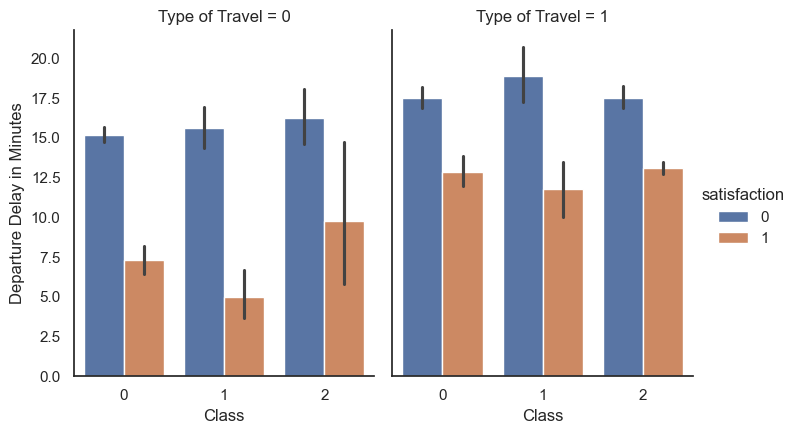

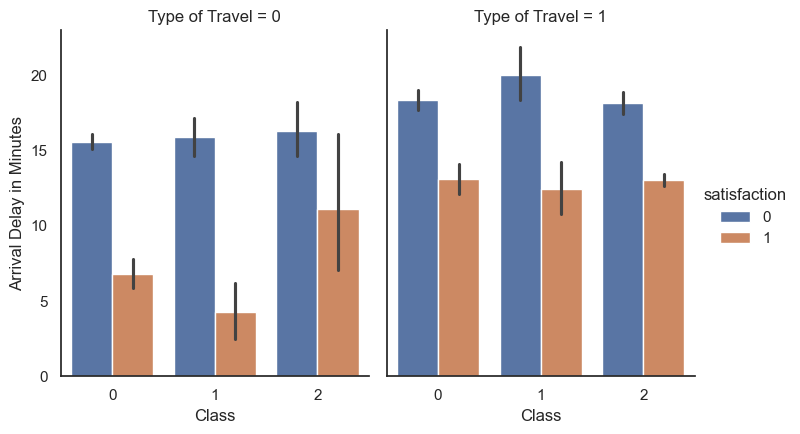

In [43]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)

Para viajes personales (especialmente Eco Plus y Eco), el no. El número de pasajeros insatisfechos es realmente elevado cuando el retraso en la llegada en minutos es elevado. Ahora bien, esto es bastante obvio. En comparación minuciosa, todas las combinaciones tienen un número más alto. de pasajeros insatisfechos en comparación con el núm. de pasajeros satisfechos.

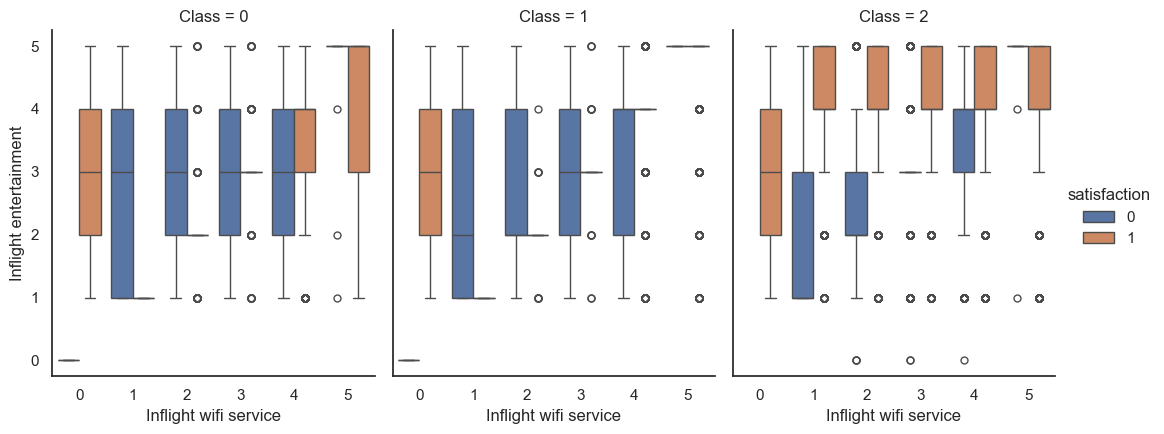

In [44]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

Es interesante descubrir que los pasajeros de Eco Plus están en su mayoría satisfechos sin servicio de Wi-Fi a bordo (calificación 0) y nivel medio de entretenimiento a bordo (calificación 2 - 4). Para los pasajeros de clase Business, sólo el nivel más alto de entretenimiento a bordo (calificación 5) puede satisfacerlos. Para los pasajeros Eco, un alto nivel de entretenimiento a bordo (calificación 3 - 5) y una disponibilidad muy alta del servicio Wi-Fi (calificación 5) pueden hacer que estén satisfechos.

### Detección y eliminación de outliers

In [45]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   2.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
Checkin service                         1.0
Inflight service                        2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                            1.0
dtype: float64


In [46]:
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 19)

### Seleccionamos las variables mas importantes para la satsisfaccion o no del cliente:

<Axes: >

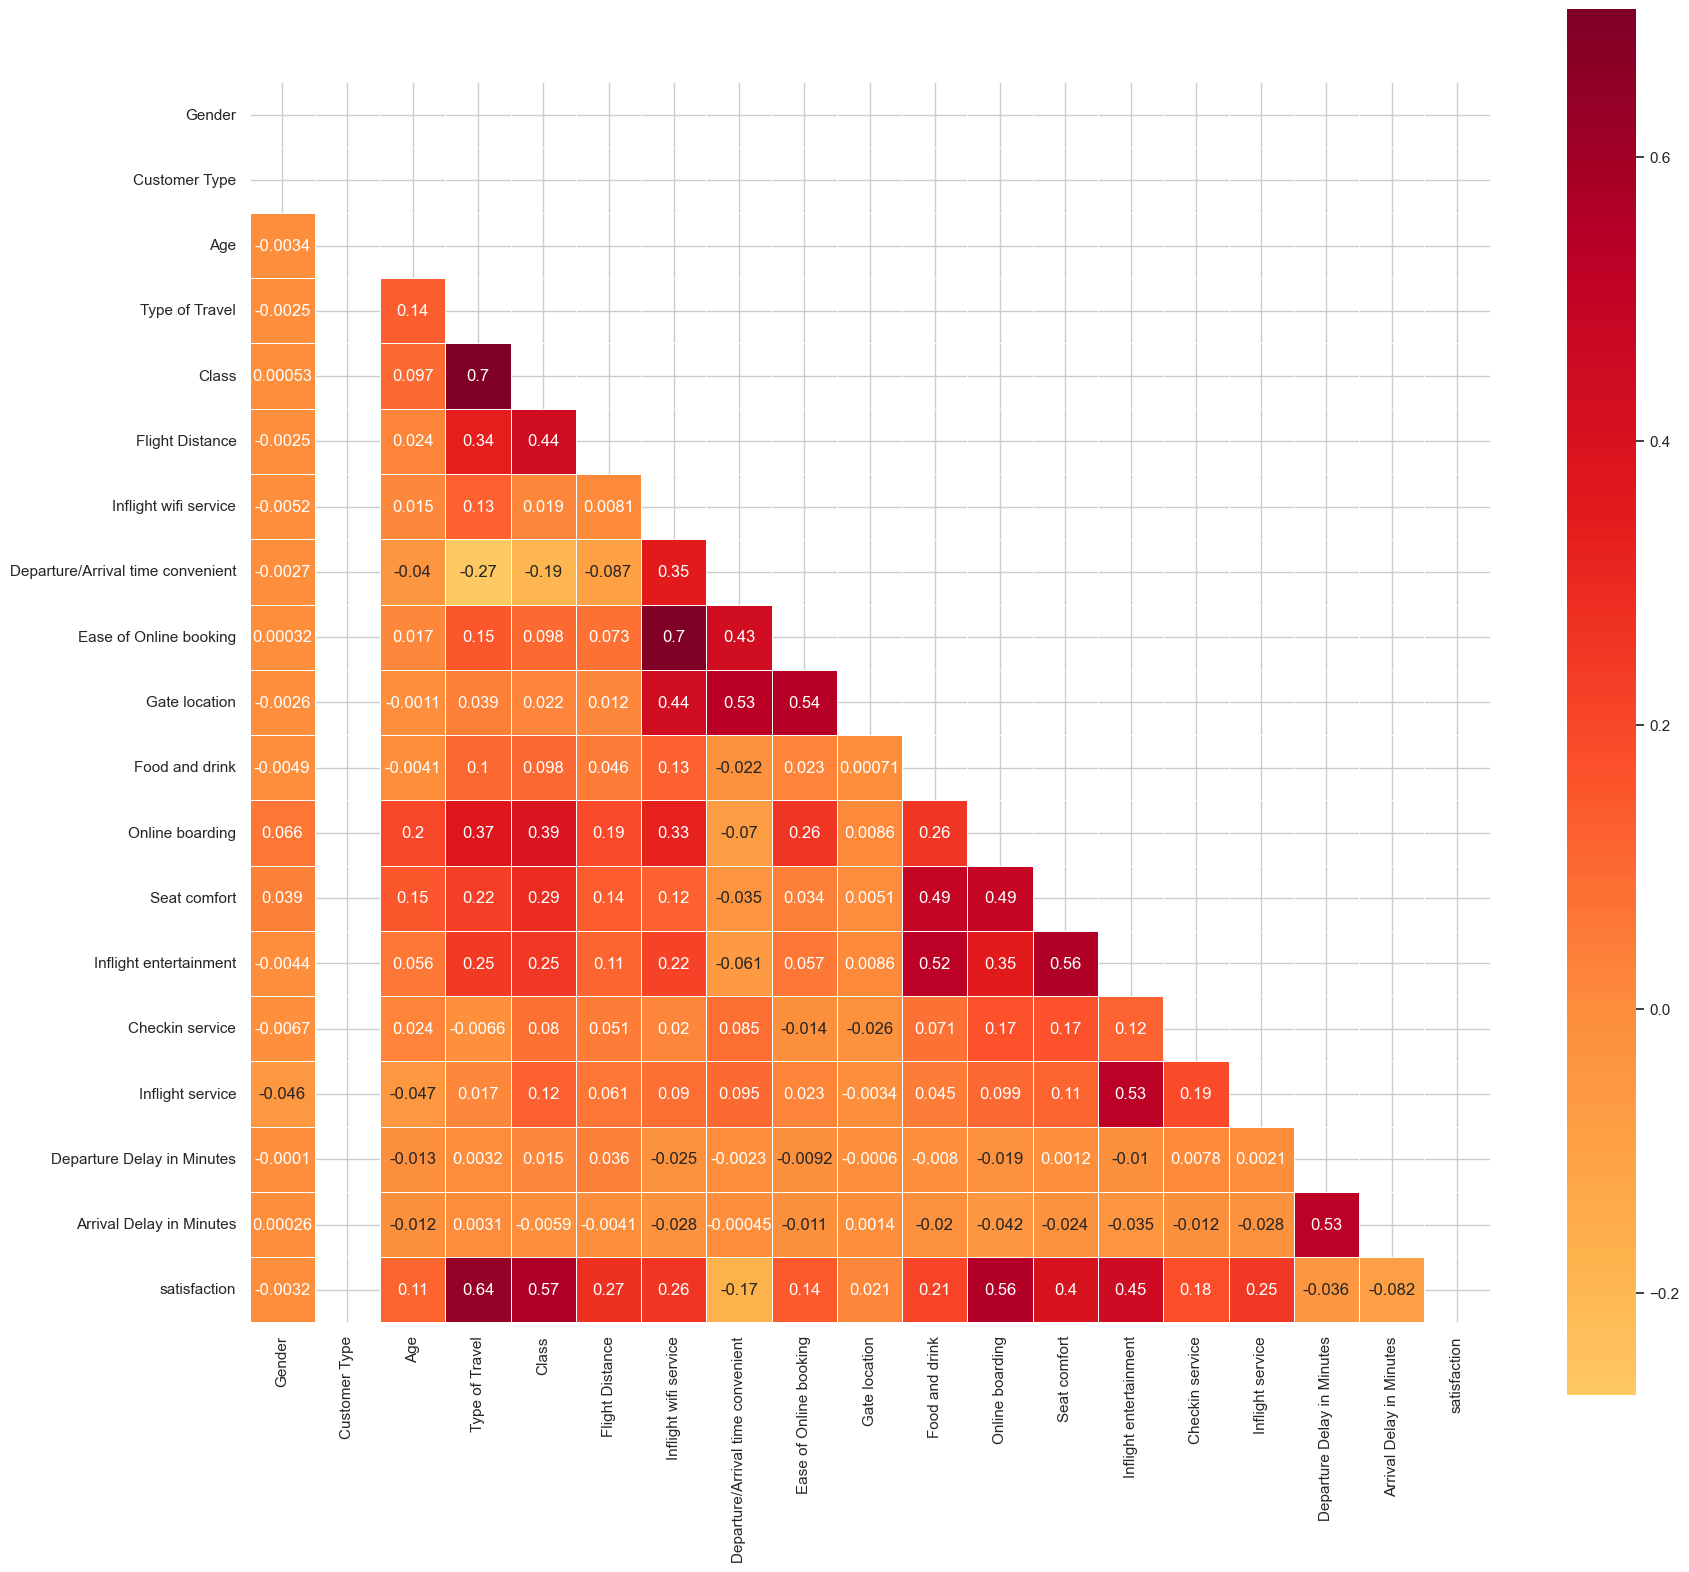

In [55]:
corr = train.corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(20, 18))


sns.heatmap(corr, annot = True, mask=mask, cmap="YlOrRd", center=0,
            square=True, linewidths=.5)

-Vemos que las Mejores columnas para la clasificación son: Online Booking, Class y Type of Travel

-Tambien vemos que a diferencia de lo planteado en uno de los incisos de la hipotesis, el retraso de salida y llegada no son tan importantes en la satisfaccion del cliente. 

## Selección de las 10 caracteristicas principales a través de Chi-Cuadrado

In [48]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,0.076923,0.0,0.5,0.115789,0.6,0.8,0.6,0.2,1.0,0.6,1.00,1.0,0.666667,1.0,0.833333,0.56250,0.0
1,1.0,0.0,0.243590,1.0,1.0,0.299865,0.4,0.4,0.4,0.4,1.0,1.0,1.00,1.0,0.666667,0.8,0.000000,0.00000,1.0
2,0.0,0.0,0.692308,1.0,1.0,0.049393,0.6,0.6,0.6,0.6,0.8,1.0,1.00,0.6,0.333333,0.6,0.000000,0.00000,1.0
3,1.0,0.0,0.243590,0.0,0.0,0.310121,0.6,0.8,0.4,0.2,0.2,0.4,0.00,0.2,0.666667,0.8,0.000000,0.00000,0.0
4,0.0,0.0,0.512821,0.0,0.0,0.336032,0.4,0.8,0.4,0.6,0.4,0.4,0.25,0.4,0.333333,1.0,0.300000,0.71875,0.0


In [49]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Checkin service', 'Inflight service'],
      dtype='object')


Estas son las 10 características principales que impactan en la satisfacción de los pasajeros. También comprobaremos la importancia de las características con otro método.

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']
[0.0052245  0.         0.03371315 0.19256933 0.12103566 0.03934212
 0.13084901 0.02148224 0.03366804 0.01997648 0.01419773 0.14675724
 0.06560737 0.08617337 0.03026636 0.03969722 0.0089369  0.01050326]


Por lo tanto, sólo estas seis características son intrínsecamente importantes para contribuir a la satisfacción de los pasajeros.

### Conclusiones
A lo largo del proyecto, se analizó la satisfacción de los clientes de una aerolínea utilizando herramientas de análisis de datos y estadistica. Este enfoque permitió identificar los factores clave que más influyen en la percepción de los pasajeros sobre su experiencia de vuelo.

Entre todas las variables estudiadas, se determinó que las más importantes para predecir la satisfacción son:

- Type of Travel: Tipo de viaje (personal o de negocios).
- Class: Clase en la que viajó el pasajero (económica, económica premium, o ejecutiva).
- Inflight Wifi Service: Calidad del servicio de WiFi a bordo.
- Online Boarding: Facilidad y experiencia del proceso de abordaje en línea.
- Seat Comfort: Comodidad del asiento.
- Inflight Entertainment: Entretenimiento disponible durante el vuelo.

Estas variables se destacaron por su importancia en los graficos, destacando especialmente el impacto del tipo de viaje y la calidad del servicio de abordaje en línea, que demostraron ser determinantes en la satisfacción del pasajero.

### Reflexión Final
Los resultados obtenidos confirman que la experiencia del cliente no solo depende de factores básicos, como la comodidad del asiento o la calidad del entretenimiento, sino también de elementos más recientes e innovadores, como la facilidad en el proceso de abordaje en línea o la conectividad WiFi a bordo. Esto subraya la importancia de adaptar las estrategias de las aerolíneas a las necesidades y expectativas de los viajeros modernos.